# Part1 - Using Imbalanced Original data

In [1]:
# Importing and installing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the train_unbalanced data

df = pd.read_csv('Unbalanced_data.csv')
df

,description,label
0,A 23-year-old white female presents with compl...,Allergy / Immunology
1,"Acute allergic reaction, etiology uncertain, h...",Allergy / Immunology
2,Mother states he has been wheezing and coughing.,Allergy / Immunology
3,Patient having severe sinusitis about two to t...,Allergy / Immunology
4,Functional endoscopic sinus surgery with left ...,Allergy / Immunology
...,...,...
5008,Normal vasectomy,Urology
5009,Normal vasectomy,Urology
5010,Desire for sterility. Vasectomy. The vas was i...,Urology
5011,Fertile male with completed family. Elective m...,Urology


In [3]:
df.isnull().sum()

description    6
label          0
dtype: int64

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5007 entries, 0 to 5012
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  5007 non-null   object
 1   label        5007 non-null   object
dtypes: object(2)
memory usage: 117.4+ KB


In [5]:
# Encode the labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
num_classes = len(label_encoder.classes_)

In [6]:
df = df[['description','label_encoded']]
df.head()

,description,label_encoded
0,A 23-year-old white female presents with compl...,0
1,"Acute allergic reaction, etiology uncertain, h...",0
2,Mother states he has been wheezing and coughing.,0
3,Patient having severe sinusitis about two to t...,0
4,Functional endoscopic sinus surgery with left ...,0


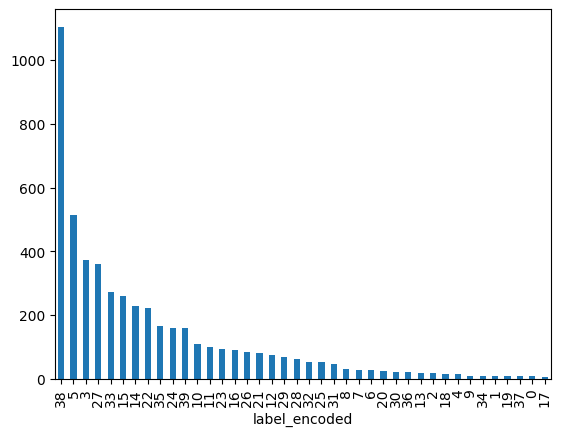

In [7]:
df.label_encoded.value_counts().plot.bar()
plt.show()

### Data preparation

In [8]:
# Separate the data into features and labels
X_text = df['description']
y = df['label_encoded']

# Create a TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

# Convert X to DataFrame with appropriate column names
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_df,  # Features
    y,     # Target
    test_size=0.2,  # 80% for training, 20% for testing
    random_state=42
)

### 1.1 Using Naive Bayes Classifier

In [9]:
# Create an instance of Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Measure training time
start_time = time.time()
# Fit the classifier on the training data
nb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = nb_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 0.09 seconds
Prediction Time: 0.03 seconds
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.41      0.19      0.25        81
           4       0.00      0.00      0.00         4
           5       0.27      0.67      0.38       113
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00        47
          15       0.00      0.00      0.00        58
          16       0.00      0.00      0.00        17


### 1.2 Using SVM Classifier

In [10]:
# Create an instance of SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Measure training time
start_time = time.time()
# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = svm_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 87.88 seconds
Prediction Time: 10.28 seconds
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.23      0.21      0.22        81
           4       0.00      0.00      0.00         4
           5       0.20      0.30      0.24       113
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.08      0.04      0.05        26
          11       0.19      0.17      0.18        18
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         4
          14       0.08      0.06      0.07        47
          15       0.05      0.03      0.04        58
          16       0.11      0.06      0.08        1

### 1.3 Using Decision-tree Classifier

In [11]:
# Create an instance of Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Measure training time
start_time = time.time()
# Fit the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = decision_tree_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 4.44 seconds
Prediction Time: 0.06 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2
           2       0.20      0.17      0.18         6
           3       0.15      0.16      0.15        81
           4       0.00      0.00      0.00         4
           5       0.08      0.09      0.08       113
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.07      0.08      0.07        26
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         4
          14       0.03      0.04      0.04        47
          15       0.05      0.03      0.04        58


### 1.4 Using Random forest Classifier

In [12]:
# Create an instance of Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Measure training time
start_time = time.time()
# Fit the classifier on the training data
random_forest_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = random_forest_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 141.72 seconds
Prediction Time: 0.17 seconds
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.20      0.17      0.18         6
           3       0.12      0.10      0.11        81
           4       0.00      0.00      0.00         4
           5       0.09      0.09      0.09       113
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.07      0.08      0.07        26
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         4
          14       0.02      0.02      0.02        47
          15       0.02      0.02      0.02        58
          16       0.00      0.00      0.00        1

### 1.5 Using KNN classifier

In [13]:
# Convert X_test to NumPy array
X_test = X_test.values

# Create an instance of K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Measure training time
start_time = time.time()
# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = knn_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 0.06 seconds
Prediction Time: 1.14 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         2
           2       0.27      0.50      0.35         6
           3       0.25      0.33      0.28        81
           4       0.00      0.00      0.00         4
           5       0.17      0.22      0.20       113
           6       0.00      0.00      0.00         2
           7       0.14      0.33      0.20         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.17      0.15      0.16        26
          11       0.24      0.28      0.26        18
          12       0.25      0.13      0.17        15
          13       0.00      0.00      0.00         4
          14       0.23      0.28      0.25        47
          15       0.15      0.09      0.11        58


### 1.6 Using XGBoost classifier

In [14]:
# Create an instance of XGBoost classifier
xgb_classifier = XGBClassifier()

# Measure training time
start_time = time.time()# Measure training time
# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = xgb_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 1324.33 seconds
Prediction Time: 0.11 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.20      0.17      0.18         6
           3       0.15      0.12      0.13        81
           4       0.00      0.00      0.00         4
           5       0.10      0.09      0.09       113
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.04      0.04      0.04        26
          11       0.05      0.06      0.05        18
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         4
          14       0.07      0.06      0.07        47
          15       0.05      0.03      0.04        

# Part2 - Applying SMOTE algorithm to create balanced data

In [15]:
# Creating balanced data

# Separate the data into features and labels
X_text = df['description']
y = df['label_encoded']

# Create a TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

# Create an instance of the SMOTE algorithm
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_balanced, y_balanced = smote.fit_resample(X, y)

# Convert X_balanced back to DataFrame with appropriate column names
balanced_data = pd.DataFrame(X_balanced.toarray(), columns=vectorizer.get_feature_names_out())

# Add the 'label_encoded' column to the DataFrame
balanced_data['label_encoded'] = y_balanced

In [16]:
balanced_data.head()

,10,100,104,107,11,1102,12,120,125,13,...,yielding,young,youngswick,zephyr,zimmer,zometa,zone,zones,zygomatic,label_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
len(balanced_data)

44160

### Splitting data into train and test

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data.drop('label_encoded', axis=1),  # Features (excluding the target 'label_encoded')
    balanced_data['label_encoded'],  # Target (encoded label)
    test_size=0.2,  # 80% for training, 20% for testing
    random_state=42
)

### 2.1 Using Naive Bayes Classifier

In [19]:
# Create an instance of Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Measure training time
start_time = time.time()# Measure training time
# Fit the classifier on the training data
nb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = nb_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")


# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 2.07 seconds
Prediction Time: 0.69 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       233
           1       1.00      1.00      1.00       225
           2       0.94      0.96      0.95       233
           3       0.69      0.64      0.66       218
           4       0.85      0.95      0.90       209
           5       0.37      0.10      0.16       218
           6       0.88      0.99      0.93       208
           7       0.94      0.98      0.96       241
           8       0.91      0.98      0.94       225
           9       0.89      1.00      0.94       221
          10       0.73      0.71      0.72       214
          11       0.82      0.82      0.82       219
          12       0.69      0.92      0.79       212
          13       0.85      1.00      0.92       223
          14       0.79      0.74      0.76       237
          15       0.57      0.32      0.41       227


### 2.2 Using SVM Classifier

In [20]:
# Create an instance of SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Measure training time
start_time = time.time()# Measure training time
# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = svm_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 1036.42 seconds
Prediction Time: 584.47 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       233
           1       1.00      1.00      1.00       225
           2       0.97      0.95      0.96       233
           3       0.72      0.61      0.66       218
           4       0.87      0.99      0.93       209
           5       0.37      0.11      0.16       218
           6       0.88      1.00      0.93       208
           7       0.94      0.97      0.96       241
           8       0.92      0.97      0.95       225
           9       0.91      1.00      0.95       221
          10       0.76      0.77      0.76       214
          11       0.83      0.85      0.84       219
          12       0.75      0.90      0.82       212
          13       0.92      1.00      0.96       223
          14       0.77      0.76      0.77       237
          15       0.59      0.37      0.46      

### 2.3 Using Decision-tree Classifier

In [21]:
# Create an instance of Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Measure training time
start_time = time.time()# Measure training time
# Fit the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = decision_tree_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 131.84 seconds
Prediction Time: 0.20 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       233
           1       1.00      1.00      1.00       225
           2       0.98      0.98      0.98       233
           3       0.47      0.45      0.46       218
           4       0.93      0.95      0.94       209
           5       0.13      0.15      0.14       218
           6       0.96      0.95      0.95       208
           7       0.97      0.97      0.97       241
           8       0.95      0.97      0.96       225
           9       0.94      0.97      0.96       221
          10       0.71      0.72      0.72       214
          11       0.83      0.82      0.83       219
          12       0.78      0.83      0.80       212
          13       0.95      0.98      0.96       223
          14       0.64      0.64      0.64       237
          15       0.39      0.34      0.36       22

### 2.4 Using Random forest Classifier

In [22]:
# Create an instance of Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Measure training time
start_time = time.time()# Measure training time
# Fit the classifier on the training data
random_forest_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = random_forest_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 306.14 seconds
Prediction Time: 1.37 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       233
           1       1.00      1.00      1.00       225
           2       0.98      0.98      0.98       233
           3       0.61      0.51      0.56       218
           4       0.94      0.95      0.95       209
           5       0.18      0.12      0.15       218
           6       0.96      0.95      0.95       208
           7       0.97      0.96      0.97       241
           8       0.94      0.98      0.96       225
           9       0.92      0.99      0.95       221
          10       0.78      0.77      0.77       214
          11       0.86      0.86      0.86       219
          12       0.82      0.89      0.85       212
          13       0.96      0.99      0.97       223
          14       0.71      0.73      0.72       237
          15       0.52      0.47      0.49       22

### 2.5 Using KNN classifier

In [23]:
# Convert X_test to NumPy array
X_test = X_test.values

# Create an instance of K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Measure training time
start_time = time.time()# Measure training time
# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = knn_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 0.29 seconds
Prediction Time: 71.32 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       233
           1       1.00      1.00      1.00       225
           2       0.95      0.99      0.97       233
           3       0.69      0.64      0.67       218
           4       0.91      0.96      0.94       209
           5       0.26      0.08      0.13       218
           6       0.94      0.97      0.95       208
           7       0.96      0.98      0.97       241
           8       0.92      0.98      0.95       225
           9       0.91      1.00      0.95       221
          10       0.70      0.77      0.73       214
          11       0.83      0.86      0.85       219
          12       0.73      0.88      0.80       212
          13       0.90      1.00      0.95       223
          14       0.73      0.82      0.77       237
          15       0.57      0.44      0.49       227

### 2.6 Using XGBoost classifier

In [24]:
# Create an instance of XGBoost classifier
xgb_classifier = XGBClassifier()

# Measure training time
start_time = time.time()# Measure training time
# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
# Predict the encoded label for the test data
y_pred = xgb_classifier.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Calculate precision, recall, and F1 score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Training Time: 9084.54 seconds
Prediction Time: 0.53 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       233
           1       1.00      1.00      1.00       225
           2       0.99      0.99      0.99       233
           3       0.65      0.56      0.60       218
           4       0.94      0.96      0.95       209
           5       0.25      0.17      0.20       218
           6       0.97      0.95      0.96       208
           7       0.97      0.96      0.96       241
           8       0.95      0.99      0.97       225
           9       0.93      1.00      0.96       221
          10       0.81      0.79      0.80       214
          11       0.86      0.89      0.88       219
          12       0.82      0.90      0.86       212
          13       0.97      0.99      0.98       223
          14       0.75      0.76      0.75       237
          15       0.54      0.41      0.47       2